<a href="https://colab.research.google.com/github/M-110/automate-the-boring-stuff/blob/main/19_Manipulating_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://nostarch.com/download/Automate_the_Boring_Stuff_onlinematerials_v.2.zip -q
!unzip -q Automate_the_Boring_Stuff_onlinematerials_v.2.zip
!rm Automate_the_Boring_Stuff_onlinematerials_v.2.zip
!mv automate_online-materials materials

# PIL

In [ ]:
import PIL
from PIL import ImageColor

In [ ]:
ImageColor.getcolor('red', 'RGBA')

(255, 0, 0, 255)

In [ ]:
ImageColor.getcolor('pink', 'RGBA')

(255, 192, 203, 255)

In [ ]:
cat = PIL.Image.open('materials/zophie.png')

In [ ]:
cat.size

(816, 1088)

In [ ]:
cat.filename

'materials/zophie.png'

In [ ]:
cat.format

'PNG'

In [ ]:
cat.format_description

'Portable network graphics'

In [ ]:
cat.save('zophie.png')

## New Image

In [ ]:
im = PIL.Image.new('RGBA', (400,200), 'purple')

In [ ]:
im.save('purple.png')

# Crop Image

In [ ]:
cat.size

(816, 1088)

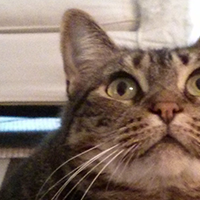

In [ ]:
cat.crop((300, 350, 500, 550))

In [ ]:
cat.crop((300, 350, 500, 550)).save('cropped_cat.png')

# Copy/pasting

In [ ]:
mosaic = PIL.Image.new('RGBA', (400, 400))

In [ ]:
cropped_cat = cat.crop((300, 350, 500, 550))

In [ ]:
mosaic.paste(cropped_cat, (0, 0))
mosaic.paste(cropped_cat, (200, 0))
mosaic.paste(cropped_cat, (0, 200))
mosaic.paste(cropped_cat, (200, 200))

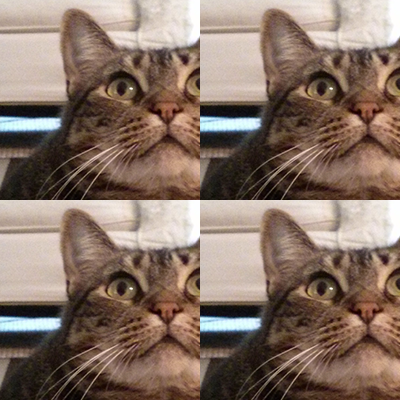

In [ ]:
mosaic

# Resize

In [ ]:
cat.size

(816, 1088)

In [ ]:
resized_cat = cat.resize(map(lambda x: x // 5, cat.size))

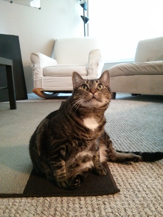

In [ ]:
resized_cat

# Rotate/Flip

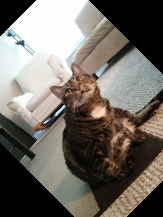

In [ ]:
resized_cat.rotate(45)

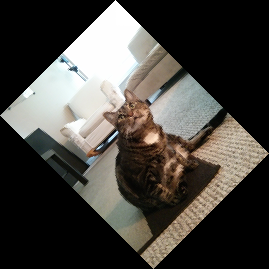

In [ ]:
resized_cat.rotate(45, expand=True)

In [ ]:
from PIL import Image

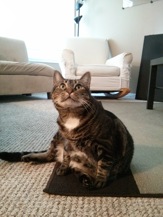

In [ ]:
resized_cat.transpose(Image.FLIP_LEFT_RIGHT)

# Changing Individual Pixels

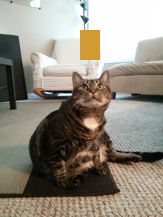

In [ ]:
cat_box = resized_cat.copy()
for x in range(80, 100):
  for y in range(30, 60):
    cat_box.putpixel((x, y), (210, 155, 50))
cat_box

# Project: Adding a Logo

In [ ]:
!git clone https://github.com/maxogden/cats.git
!mv cats/cat_photos .
!rm cats -rfd

Cloning into 'cats'...
remote: Enumerating objects: 630, done.
remote: Total 630 (delta 0), reused 0 (delta 0), pack-reused 630
Receiving objects: 100% (630/630), 98.33 MiB | 37.27 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
%%writefile add_logo.py
#!/usr/bin/env python
"""Reshape and add a logo watermark to all the image files in a directory."""
import argparse
from pathlib import Path

from PIL import Image

IMAGE_TYPES = ['*.jpg', '*.png']


def main():
  """Program begins here."""
  args = get_args()
  logo = Image.open(args.logo)
  image_dir = Path(args.directory)

  image_files = [image_file
                 for results in map(lambda x: image_dir.glob(x), IMAGE_TYPES)
                 for image_file in results]

  outputdir = image_dir.parent / (image_dir.name + '_watermarked')
  outputdir.mkdir(exist_ok=True)
  
  for image_file in image_files:
    image = Image.open(image_file)
    image = reshape(image, (args.width, args.height))
    image = add_logo_to_image(image, logo, args.ratio)
    image.convert('RGB').save(outputdir / image_file.name)
    if args.verbose:
      print(f'Saved "{(outputdir / image_file.name)}"')
  print(f'Saved {len(image_files)} images to {outputdir}')


def get_args():
  """Get arguments from command line."""
  parser = argparse.ArgumentParser(
      description='Add a logo to the corner of images'
  )
  parser.add_argument('-d',
                      '--directory',
                      help='Directory to collect the images from')
  parser.add_argument('-l',
                      '--logo',
                      help='Image file of the logo')
  parser.add_argument('-x',
                      '--width',
                      type=int,
                      help='Width of the resulting image',
                      default=300)
  parser.add_argument('-y',
                      '--height',
                      type=int,
                      help='Height of the resulting image',
                      default=300)
  parser.add_argument('-r',
                      '--ratio',
                      type=int,
                      help='Size the percentage ratio of the logo relative ' 
                           'to the image (1-99)')
  parser.add_argument('-v',
                      '--verbose',
                      help='Print each time an image is saved',
                      action='store_true')
  return parser.parse_args()


def reshape(image, size):
  """Resize and crop the image to fit the given size."""
  multiplier = 1 / min(image.size[0] / size[0], image.size[1] / size[1])
  new_shape = (int(image.size[0] * multiplier), int(image.size[1] * multiplier))
  image = image.resize(new_shape)
  left = (image.size[0] - size[0]) // 2 
  right = (image.size[0] + size[0]) // 2
  top = (image.size[1] - size[1]) // 2 
  bottom = (image.size[1] + size[1]) // 2
  image = image.crop((left, top, right, bottom))
  return image


def add_logo_to_image(image, logo, ratio):
  """
  Add the logo to the bottom right corner of the image.
  
  Returns the newly watermarked image object.
  """
  image = image.convert('RGBA')
  logo_width = min(image.size) * ratio / 100
  multiplier = 1 / (logo.size[0] / logo_width)
  new_logo_shape = (int(logo.size[0] * multiplier), 
                    int(logo.size[1] * multiplier))
  resized_logo = logo.resize(new_logo_shape)
  left = image.size[0] - resized_logo.size[0]
  top = image.size[1] - resized_logo.size[1]
  image.paste(resized_logo, (left, top), resized_logo)
  return image


if __name__ == '__main__':
  main()


Writing add_logo.py


In [ ]:
!python add_logo.py -d materials/ -l materials/catlogo.png -x 100 -y 300 -r 12 -v

Saved "materials_watermarked/catlogo.png"
Saved "materials_watermarked/zophie.png"
Saved 2 images to materials_watermarked


In [ ]:
!python add_logo.py -d cat_photos/ -l materials/catlogo.png -x 300 -y 300 -r 22 -v

Saved "cat_photos_watermarked/kublai112.jpg"
Saved "cat_photos_watermarked/kublai19.jpg"
Saved "cat_photos_watermarked/kublai41.jpg"
Saved "cat_photos_watermarked/kublai39.jpg"
Saved "cat_photos_watermarked/kublai80.jpg"
Saved "cat_photos_watermarked/kublai70.jpg"
Saved "cat_photos_watermarked/kublai101.jpg"
Saved "cat_photos_watermarked/kublai16.jpg"
Saved "cat_photos_watermarked/kublai23.jpg"
Saved "cat_photos_watermarked/kublai86.jpg"
Saved "cat_photos_watermarked/kublai110.jpg"
Saved "cat_photos_watermarked/kublai87.jpg"
Saved "cat_photos_watermarked/kublai49.jpg"
Saved "cat_photos_watermarked/kublai92.jpg"
Saved "cat_photos_watermarked/kublai47.jpg"
Saved "cat_photos_watermarked/kublai38.jpg"
Saved "cat_photos_watermarked/kublai46.jpg"
Saved "cat_photos_watermarked/kublai78.jpg"
Saved "cat_photos_watermarked/kublai65.jpg"
Saved "cat_photos_watermarked/kublai116.jpg"
Saved "cat_photos_watermarked/kublai37.jpg"
Saved "cat_photos_watermarked/kublai106.jpg"
Saved "cat_photos_watermark

# Drawing on images

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
im = Image.new('RGBA', (200, 200), 'white')

In [ ]:
draw = ImageDraw.Draw(im)

In [ ]:
draw.point((100, 100), 'red')

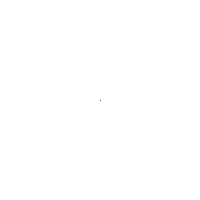

In [ ]:
im

In [ ]:
draw.line([(0, 50), (150, 75)], 'purple', 5)

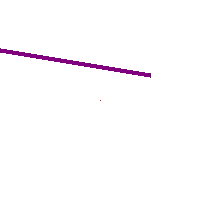

In [ ]:
im

In [ ]:
draw.rectangle(((3,120, 50, 190)), 'orange', 'blue')

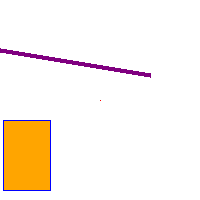

In [ ]:
im

In [ ]:
draw.ellipse((150, 20, 200, 60), 'green', 'pink')

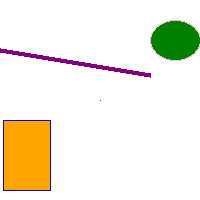

In [ ]:
im

In [ ]:
draw.polygon([(25,50), (50, 34), (62, 150), (34, 38), (150, 20)], 'black', 'red')

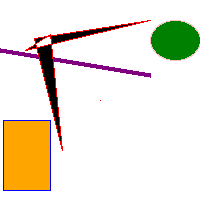

In [ ]:
im

In [ ]:
im.save('beautiful.png')

# Drawing Text

In [ ]:
im = Image.new('RGBA', (200, 200), 'white')
draw = ImageDraw.Draw(im)

In [ ]:
draw.text((40, 40), 'Hello, World!', 'red')

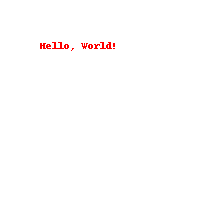

In [ ]:
im

# Practice Projects

## Find Photo Folders

In [ ]:
%%writefile photo_folders.py
#!/usr/bin/env python
"""Find and print all folders in a given directory that have a
given threshold of image files."""
import argparse
import os


IMAGE_TYPES = ['.jpg', '.png', '.bmp', '.gif', '.jpeg']


def main():
  """Program entry point."""
  args = get_args()
  min_ratio = args.ratio / 100
  folder_count = 0
  for foldername, _, filenames in os.walk(args.directory):
    if len(filenames) == 0:
      continue
    image_count = sum(filename.endswith(image_type)
                      for image_type in IMAGE_TYPES
                      for filename in filenames)
    image_ratio = image_count / len(filenames)
    if image_ratio >= min_ratio:
      folder_count += 1
      print(foldername)
  print(f'Located {folder_count} image folders in directory {args.directory}')


def get_args():
  """Get arguments from command line."""
  parser = argparse.ArgumentParser(
      description='Scan a directory for image folders'
  )
  parser.add_argument('-d',
                      '--directory',
                      help='Directory to scan')
  parser.add_argument('-r',
                      '--ratio',
                      type=int,
                      help='Percent threshold required to be '
                           'considered an image folder (1-99)',
                      default=25)
  return parser.parse_args()

if __name__ == '__main__':
  main()
    

Writing photo_folders.py


In [ ]:
!chmod +x photo_folders.py

In [ ]:
!./photo_folders.py -d . -r 25

.
./cat_photos_watermarked
./materials_watermarked
./cat_photos
Located 4 image folders in directory .


In [ ]:
!./photo_folders.py -d / -r 75

/usr/local/lib/python3.7/dist-packages/skimage/feature/tests/data
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/baseline_images/test_axes_grid1
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/baseline_images/test_axes_grid
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/baseline_images/test_mplot3d
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/baseline_images/test_axisartist_clip_path
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/baseline_images/test_axisartist_axis_artist
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/baseline_images/test_axisartist_grid_helper_curvelinear
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/baseline_images/test_axisartist_floating_axes
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/baseline_images/test_axisartist_axislines
/usr/local/lib/python3.7/dist-packages/colorcet/examples/assets/images
/usr/local/lib/python3.7/dist-packages/bokeh/sampledata/_data/icons
/usr/loca

# Find Big Folders

In [ ]:
%%writefile big_folders.py
#!/usr/bin/env python
"""Locate large folders in a directory."""
import argparse
import os
from os.path import getsize
from pathlib import Path

BYTES_PER_MB = 1_048_576

def main():
  """Program entry point."""
  args = get_args()
  min_size = args.size * BYTES_PER_MB 
  folder_count = 0
  for foldername, _, filenames in os.walk(args.directory):
    folder = Path(foldername)
    size = 0
    for filename in filenames:
      try:
        size += getsize(folder / filename)
      except FileNotFoundError:
        continue
    if size > min_size:
      size_in_mb = size / BYTES_PER_MB
      folder_count += 1
      if size_in_mb > 1024:
        print(f'{foldername}: {size_in_mb / 1024:.2f} GB')
      else:
        print(f'{foldername}: {size_in_mb:.2f} MB')
  print(f'Located {folder_count} folders with a size greater than {args.size} MB')


def get_args():
  """Get arguments from command line."""
  parser = argparse.ArgumentParser(
      description='Scan a directory for large folders'
  )
  parser.add_argument('-d',
                      '--directory',
                      help='Directory to scan')
  parser.add_argument('-s',
                      '--size',
                      type=int,
                      help='Size in MB',
                      default=500)
  return parser.parse_args()

if __name__ == '__main__':
  main()
    

Writing big_folders.py


In [ ]:
!python big_folders.py -d '/'

/usr/local/lib: 772.50 MB
/usr/local/lib/python3.7/dist-packages/torch/lib: 4.11 GB
/usr/local/lib/python3.7/dist-packages/tensorflow/python: 969.57 MB
/usr/local/lib/python2.7/dist-packages/torch/lib: 1.26 GB
/usr/local/lib/python2.7/dist-packages/tensorflow_core/python: 1.00 GB
/usr/local/cuda-11.0/targets/x86_64-linux/lib: 6.04 GB
/usr/local/cuda-10.1/targets/x86_64-linux/lib: 3.47 GB
/usr/local/cuda-11.1/targets/x86_64-linux/lib: 7.90 GB
/usr/local/cuda-10.0/targets/x86_64-linux/lib: 2.76 GB
/usr/lib/x86_64-linux-gnu: 11.87 GB
/etc/alternatives: 943.77 MB
/tensorflow-1.15.2/python3.7/tensorflow_core/python: 955.38 MB
/tensorflow-1.15.2/python2.7/tensorflow_core/python: 955.57 MB
Located 13 folders with a size greater than 500 MB


# Custom Seating Cards

In [ ]:
!cat materials/guests.txt

Prof. Plum
Miss Scarlet
Col. Mustard
Al Sweigart
Robocop

### Create Flower Graphic

In [ ]:
!wget https://www.publicdomainpictures.net/pictures/370000/velka/blume-rose-vintage-kunst-16022611717jR.png -O flower.png 

--2021-10-28 19:20:57--  https://www.publicdomainpictures.net/pictures/370000/velka/blume-rose-vintage-kunst-16022611717jR.png
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 104.20.44.162, 172.67.2.204, 104.20.45.162, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|104.20.44.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2923063 (2.8M) [image/png]
Saving to: ‘flower.png’

flower.png          100%[===================>]   2.79M  --.-KB/s    in 0.07s   

2021-10-28 19:20:58 (40.0 MB/s) - ‘flower.png’ saved [2923063/2923063]



In [ ]:
from PIL import Image, ImageDraw

flower = Image.open('flower.png')

flower.size

(1355, 1920)

In [ ]:
resize_ratio = 1920 / 200

In [ ]:
new_size = (int(1355 / resize_ratio), int(1920 // resize_ratio))
new_size

(141, 200)

In [ ]:
flower = flower.resize(new_size, Image.ANTIALIAS)

### Download Fonts

In [ ]:
!wget https://www.1001fonts.com/download/precious.zip
!unzip precious.zip
!rm precious.zip

--2021-10-28 20:11:04--  https://www.1001fonts.com/download/precious.zip
Resolving www.1001fonts.com (www.1001fonts.com)... 54.39.182.171
Connecting to www.1001fonts.com (www.1001fonts.com)|54.39.182.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27768 (27K) [application/zip]
Saving to: ‘precious.zip’

precious.zip        100%[===================>]  27.12K  --.-KB/s    in 0.02s   

2021-10-28 20:11:04 (1.21 MB/s) - ‘precious.zip’ saved [27768/27768]

Archive:  precious.zip
This font was downloaded from 1001fonts.com
replace Precious.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Precious.ttf            
  inflating: 1001fonts-precious-eula.txt  


### Create card template

In [ ]:
card = Image.new('RGB', (362, 290), 'white')

In [ ]:
card.paste(flower, (0, 45), flower)

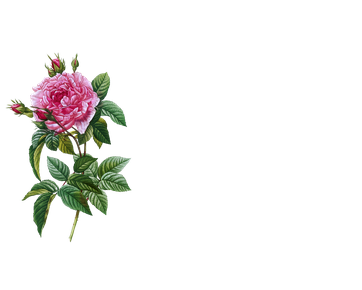

In [ ]:
card

In [ ]:
draw = ImageDraw.Draw(card)

In [ ]:
draw.rectangle((0, 0, 361, 289), outline='black', width=2)

In [ ]:
cursive_font = ImageFont.truetype('Precious.ttf', 28)
draw.text((125, 75), 'Reserved For', fill='black', font=cursive_font)

In [ ]:
card.save('seat_template.png')

### Create module

In [ ]:
%%writefile seating_cards.py
#!/usr/bin/env python
"""Generate images of seating cards using a guest list."""
import argparse
from pathlib import Path

from PIL import Image, ImageDraw, ImageFont

TEMPLATE = 'seat_template.png'
FONT = 'Precious.ttf'
FONT_SIZE = 28


def main():
  """Program entry point."""
  args = get_args()
  guests = args.guests.read().split('\n')

  outputdir = Path(args.output)
  outputdir.mkdir(exist_ok=True)

  template = Image.open(TEMPLATE)
  font = ImageFont.truetype(FONT, FONT_SIZE)

  for guest in guests:
    guest_card = template.copy()
    draw = ImageDraw.Draw(guest_card)  
    draw.text((125, 140), guest, fill='black', font=font)
    guest_card.save(outputdir / (guest + '.png'))

  print(f'Saved {len(guests)} seating cards to {outputdir}')


def get_args():
  """Get arguments from command line."""
  parser = argparse.ArgumentParser(
      description="Generate images of seating cards using a guest list"
  )
  parser.add_argument('guests',
                      type=argparse.FileType('r'),
                      help='Text file containing list of guests')
  parser.add_argument('-o',
                      '--output',
                      help='Directory to save images in',
                      default='seating_cards')
  return parser.parse_args()


if __name__ == '__main__':
  main()


Overwriting seating_cards.py


In [ ]:
!chmod +x seating_cards.py

In [ ]:
!./seating_cards.py materials/guests.txt

Saved 5 seating cards to seating_cards
